In [6]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_excel(r'C:\Users\mariu\Documents\Project Local Elections\bayern_historisch_3.xlsx')
df_1 = df.dropna()

df_1

,Unnamed: 0,city,year,party,place_list,name_official,votes,doctor,last_name,first_name,...,share_german_male,share_german_female,share_foreign_male,share_foreign_female,share_age65plus,share_age50_65,share_age40_50,share_age30_40,share_age25_30,share_age18_24
0,0,München,2014,CSU,1,"Schmid, Josef",227061,0,Schmid,Josef,...,36.564973,39.437137,12.041685,11.956205,17.917940,17.314058,15.128527,17.254250,9.340759,8.029399
1,1,München,2014,CSU,2,"Dr. Menges, Evelyne",164619,1,Menges,Evelyne,...,36.564973,39.437137,12.041685,11.956205,17.917940,17.314058,15.128527,17.254250,9.340759,8.029399
2,2,München,2014,CSU,3,"Quaas, Richard",163584,0,Quaas,Richard,...,36.564973,39.437137,12.041685,11.956205,17.917940,17.314058,15.128527,17.254250,9.340759,8.029399
3,3,München,2014,CSU,4,"Burkhardt, Beatrix",166634,0,Burkhardt,Beatrix,...,36.564973,39.437137,12.041685,11.956205,17.917940,17.314058,15.128527,17.254250,9.340759,8.029399
4,4,München,2014,CSU,5,"Offman, Marian",166632,0,Offman,Marian,...,36.564973,39.437137,12.041685,11.956205,17.917940,17.314058,15.128527,17.254250,9.340759,8.029399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20385,20385,Krumbach,2014,Junge Liste Krumbach,15,"Erhard, Daniel",409,0,Erhard,Daniel,...,429.795629,434.435414,52.355401,44.732897,21.810148,21.699676,14.298114,11.275941,5.902312,7.654068
20386,20386,Krumbach,2014,Junge Liste Krumbach,20,"Lobermeier, Jürgen",339,0,Lobermeier,Jürgen,...,429.795629,434.435414,52.355401,44.732897,21.810148,21.699676,14.298114,11.275941,5.902312,7.654068
20387,20387,Krumbach,2014,Junge Liste Krumbach,13,"Feistle, Barbara",338,0,Feistle,Barbara,...,429.795629,434.435414,52.355401,44.732897,21.810148,21.699676,14.298114,11.275941,5.902312,7.654068
20388,20388,Krumbach,2014,Junge Liste Krumbach,18,"Span, Thomas",338,0,Span,Thomas,...,429.795629,434.435414,52.355401,44.732897,21.810148,21.699676,14.298114,11.275941,5.902312,7.654068


In [45]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


In [46]:
def bootstrap_prediction(data, repetitions, batch_size):

    # For each repetition:

    bootstrap = []
    bs_data = pd.DataFrame(columns=[])
    model = Lasso()
   
    for i in range(0, repetitions):
        
        bootstrap = data.sample(n=batch_size, replace=True)
        
        X = bootstrap[['place_list','search_res_stand', 'doctor', 'Male', 'prof', 'royal', 'muslim', 'incumbent',
                    'non_muslim_migrant', 'CSU', 'SPD', 'Grüne', 'FW', 'Linke', 'FDP', 'ödp', 'BP', 'AfD', 'REP', 'BP', 
                    'Piraten', 'youth_list', 'first_try', 'political_mood', 'share_age65plus', 'share_foreign',
                    'share_male', 'share_age18_24', 'share_age50_65', 'share_age40_50', 'share_age30_40', 'share_age25_30',
                    'total_pop.x'
                    ]]
        
        Y = bootstrap[['votes']]
        
        model.fit(X, Y)
        bootstrap_prediction = model.predict(X)
        
        predictions = pd.DataFrame(data = [bootstrap_prediction, bootstrap['Unnamed: 0'], bootstrap['city'], 
                                           bootstrap['year'], bootstrap['party']])
        predictions_2 = predictions.T
        
        
        
        bs_data = bs_data.append(predictions_2, ignore_index=True)
    
    bs_data.columns = ['prediction', 'index', 'city', 'year', 'party']

    return bs_data


# What is left to do: Standardize some columns before going into bootstrap loop
# How to determine the optimal batch_size and repetitions ?
# Difference between jackknife and bootstrap ?

In [47]:
dataframe = bootstrap_prediction(df_1, 1000, 1000)

In [61]:
dataframe_2

,,,,prediction,std,count
index,city,year,party,,,
0,München,2014,CSU,75395.707098,6672.760415,74
1,München,2014,CSU,74743.725190,7086.213740,61
2,München,2014,CSU,72893.688087,7135.836882,75
3,München,2014,CSU,75516.096247,6578.764452,94
4,München,2014,CSU,71207.649777,7065.352019,66
...,...,...,...,...,...,...
20385,Krumbach,2014,Junge Liste Krumbach,-3527.062396,1318.014463,68
20386,Krumbach,2014,Junge Liste Krumbach,-3679.185413,1539.711886,70
20387,Krumbach,2014,Junge Liste Krumbach,-2805.601793,1533.512563,55


In [60]:
dataframe['prediction'] = pd.to_numeric(dataframe['prediction'])
dataframe_2 = dataframe.groupby(['index', 'city', 'year', 'party']).mean()
dataframe_2['std'] = dataframe.groupby(['index', 'city', 'year', 'party']).std()
dataframe_2['count'] = dataframe.groupby(['index', 'city', 'year', 'party']).count()

def confidence_interval(data, mean, z_value, std, obs):
    
    """ Create confidence interval for each individual """
    
    for i in range(len(data)):
        
        data['ci_up'] = mean + z_value * (std/obs)
    
        data['ci_low'] = mean - z_value * (std/obs)


In [62]:
# z-value for 68% (one standard deviation), easier to interpret for non-statisticians (2 out of three)
confidence_interval(dataframe_2, dataframe_2['prediction'], 0.9945, dataframe_2['std'], dataframe_2['count'])
dataframe_2

,,,,prediction,std,count,ci_up,ci_low
index,city,year,party,,,,,
0,München,2014,CSU,75395.707098,6672.760415,74,75485.383587,75306.030608
1,München,2014,CSU,74743.725190,7086.213740,61,74859.253708,74628.196673
2,München,2014,CSU,72893.688087,7135.836882,75,72988.309284,72799.066890
3,München,2014,CSU,75516.096247,6578.764452,94,75585.698176,75446.494319
4,München,2014,CSU,71207.649777,7065.352019,66,71314.111785,71101.187768
...,...,...,...,...,...,...,...,...
20385,Krumbach,2014,Junge Liste Krumbach,-3527.062396,1318.014463,68,-3507.786435,-3546.338358
20386,Krumbach,2014,Junge Liste Krumbach,-3679.185413,1539.711886,70,-3657.310506,-3701.060320
20387,Krumbach,2014,Junge Liste Krumbach,-2805.601793,1533.512563,55,-2777.873097,-2833.330488


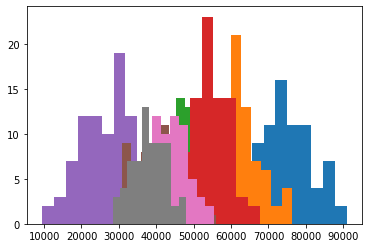

In [64]:
from matplotlib import pyplot
from scipy import stats


p_list = []
data_test = []

for i in (0, 27, 340, 1000, 876, 555, 197, 1438):
    
    test = i
    data_test = dataframe[dataframe['index'] == test]
    
    p = stats.shapiro(data_test['prediction'])
    p_list.append(p)
    
    pyplot.hist(data_test['prediction'])

    
pyplot.show(), p_list